In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [20]:
df.shape

(1338, 7)

In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [14]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
numerical_cols = [col for col in df.columns if df[col].dtype!='O']
categorical_cols = [col for col in df.columns if df[col].dtype=='O']

In [7]:
numerical_cols

['age', 'bmi', 'children', 'expenses']

In [8]:
categorical_cols

['sex', 'smoker', 'region']

In [9]:
continuous_cols = [col for col in numerical_cols if df[col].nunique() >= 25]
discrete_cols = [col for col in numerical_cols if df[col].nunique() < 25]

In [10]:
continuous_cols

['age', 'bmi', 'expenses']

In [11]:
discrete_cols

['children']

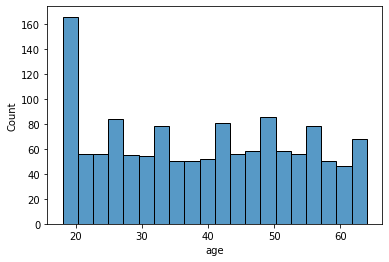

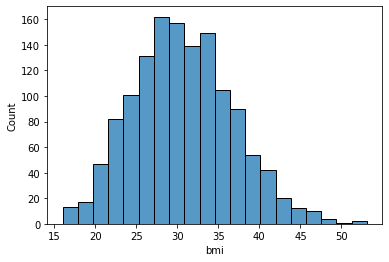

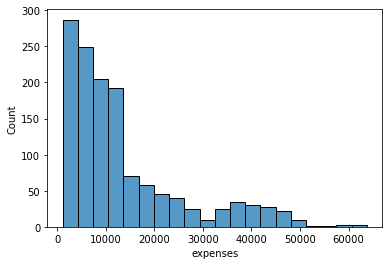

In [13]:
for col in continuous_cols:
    sns.histplot(df[col], bins=20)
    plt.show()

<AxesSubplot:xlabel='children', ylabel='Count'>

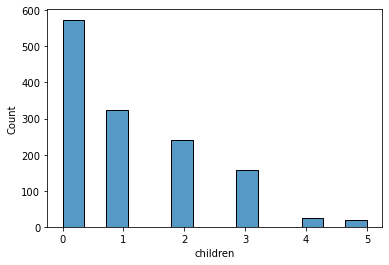

In [15]:
sns.histplot(df['children'])

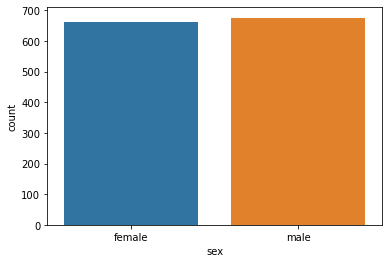

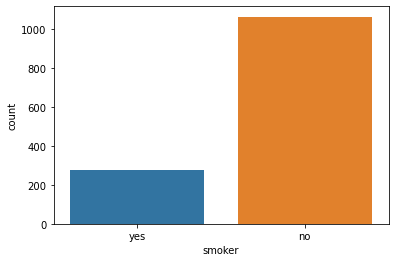

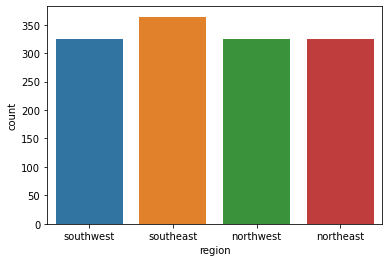

In [19]:
for col in categorical_cols:
    sns.countplot(x=df[col])
    plt.show()

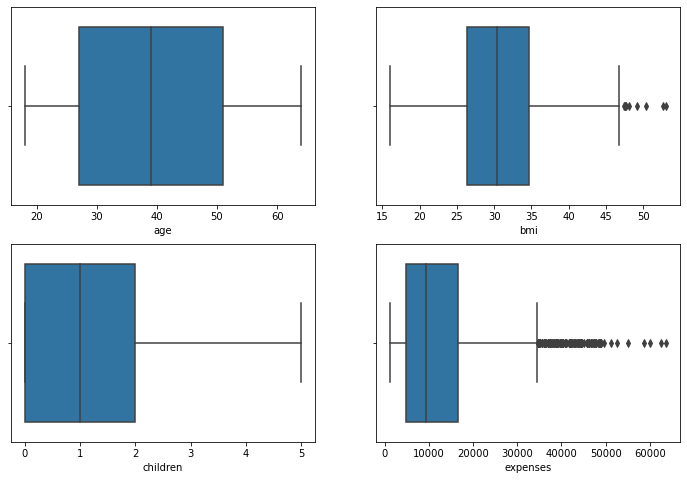

In [24]:
plt.figure(figsize=(12, 8))

count = 1
for col in numerical_cols:
    plt.subplot(2, 2, count)
    sns.boxplot(x=df[col])
    count += 1
    
plt.show()